## ML using Lasso Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.metrics import (mean_absolute_percentage_error,
                             mean_squared_error, r2_score)

### 1. Run the feature engineering file to get the train, val, test set

[*********************100%***********************]  1 of 1 completed


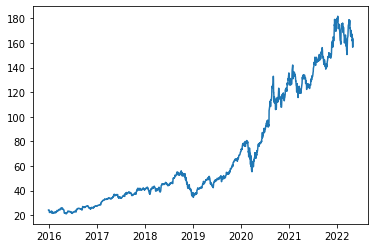

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1573 non-null   datetime64[ns]
 1   D_m3       1573 non-null   float64       
 2   D_m2       1573 non-null   float64       
 3   D_m1       1573 non-null   float64       
 4   Adj Close  1573 non-null   float64       
 5   bb_m1      1573 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 73.9 KB
           Date
0    2016-02-02
1    2016-02-03
2    2016-02-04
3    2016-02-05
4    2016-02-08
...         ...
1567 2022-04-22
1568 2022-04-25
1569 2022-04-26
1570 2022-04-27
1571 2022-04-28

[1572 rows x 1 columns]
         bb_m1      D_m3      D_m2      D_m1
0    -0.105413  0.007172  0.034541 -0.009348
1    -0.134901  0.034541 -0.009348 -0.020222
2    -0.108551 -0.009348 -0.020222  0.019793
3    -0.060615 -0.020222  0.019793  0.008035
4     0.042267  

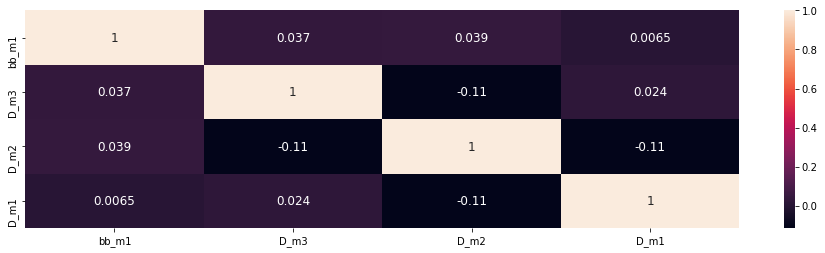

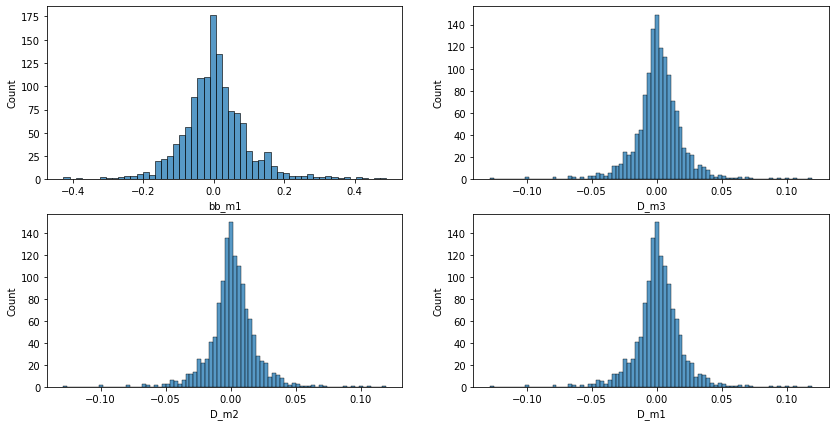

In [3]:
## Run below code to get data inclusive of Bband only with prices
%run DS105FP_ProjectScript_EdwinWan_1featureeng_final.ipynb

## Run below code to get data inclusive of MACD, MFI and BBand with prices
# %run DS105FP_ProjectScript_EdwinWan_1featureeng_initial.ipynb

### 2. Create the Lasso Regression model (base)

In [4]:
#Create the Lasso Regression model
model = Lasso()
model.fit(x_train, y_train)
model

Lasso()

### 3. Using model to predict for train-val-test data

In [7]:
train_predictions = model.predict(x_train)
train_predictions

array([0.00147281, 0.00147281, 0.00147281, ..., 0.00147281, 0.00147281,
       0.00147281])

In [8]:
pred_train = pd.DataFrame(train_predictions, columns=['pred_train'])
pred_train

,pred_train
0,0.001473
1,0.001473
2,0.001473
3,0.001473
4,0.001473
...,...
1331,0.001473
1332,0.001473
1333,0.001473
1334,0.001473


In [9]:
#(Train data) Combining date, predicted pct change, previous close price and regenerate actual close and predicted close data
df_compare = dates_train.merge(y_train, how='left', left_index=True, right_index=True)
df_compare = df_compare.merge(pred_train, how='left', left_index=True, right_index=True)
df_compare = df_compare.merge(prev_train, how='left', left_index=True, right_index=True)
df_compare['actual_close']=(df_compare['Adj Close']*df_compare['prev_close'])+df_compare['prev_close']
df_compare['pred_close']=(df_compare['pred_train']*df_compare['prev_close'])+df_compare['prev_close']
df_compare

,Date,Adj Close,pred_train,prev_close,actual_close,pred_close
0,2016-02-02,-0.020222,0.001473,22.169819,21.721498,22.202471
1,2016-02-03,0.019793,0.001473,21.721498,22.151423,21.753490
2,2016-02-04,0.008035,0.001473,22.151423,22.329414,22.184047
3,2016-02-05,-0.026708,0.001473,22.329414,21.733034,22.362301
4,2016-02-08,0.010530,0.001473,21.733034,21.961880,21.765043
...,...,...,...,...,...,...
1331,2021-05-17,-0.009259,0.001473,126.912178,125.737152,127.099095
1332,2021-05-18,-0.011246,0.001473,125.737152,124.323151,125.922339
1333,2021-05-19,-0.001282,0.001473,124.323151,124.163826,124.506255
1334,2021-05-20,0.021012,0.001473,124.163826,126.772766,124.346695


In [10]:
#Evaluate the model performance for train data
rmse = np.sqrt(np.mean(df_compare['pred_close'] - df_compare['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare['actual_close'],df_compare['pred_close'])
r2 = r2_score(df_compare['actual_close'],df_compare['pred_close'])

print(f"The RMSE for train set is: {rmse}")
print(f"The MAPE for train set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for train set is: 0.005892517320856578
The MAPE for train set is: 0.012644926444516903
The R2 Score for test set is: 0.9981200643036636


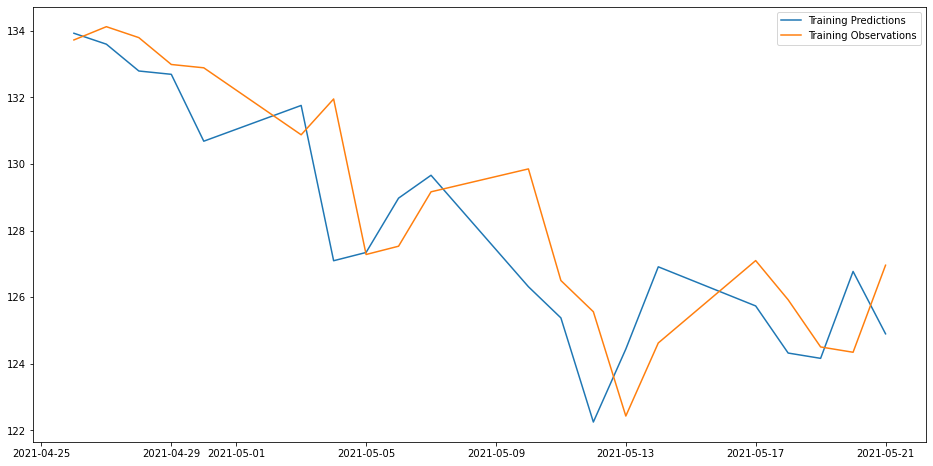

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df_compare['Date'].tail(20), df_compare['actual_close'].tail(20))
plt.plot(df_compare['Date'].tail(20), df_compare['pred_close'].tail(20))
plt.legend(['Training Predictions', 'Training Observations'])



In [12]:
val_predictions = model.predict(x_val)
pred_val = pd.DataFrame(val_predictions, columns=['pred_val'])


In [13]:
#(Test Data) Combining date, predicted pct change, previous close price and regenerate actual close and predicted close data 
df_compare2 = dates_val.reset_index(drop=True).merge(y_val.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare2 = df_compare2.merge(pred_val, how='left', left_index=True, right_index=True)
df_compare2 = df_compare2.merge(prev_val.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare2['actual_close']=(df_compare2['Adj Close']*df_compare2['prev_close'])+df_compare2['prev_close']
df_compare2['pred_close']=(df_compare2['pred_val']*df_compare2['prev_close'])+df_compare2['prev_close']
df_compare2

,Date,Adj Close,pred_val,prev_close,actual_close,pred_close
0,2021-05-24,0.013314,0.001473,124.900703,126.563652,125.084658
1,2021-05-25,-0.001574,0.001473,126.563652,126.364502,126.750056
2,2021-05-26,-0.000394,0.001473,126.364502,126.314713,126.550612
3,2021-05-27,-0.012377,0.001473,126.314713,124.751335,126.500750
4,2021-05-28,-0.005348,0.001473,124.751335,124.084167,124.935070
...,...,...,...,...,...,...
105,2021-10-21,0.001474,0.001473,148.852829,149.072220,149.072060
106,2021-10-22,-0.005285,0.001473,149.072220,148.284393,149.291774
107,2021-10-25,-0.000336,0.001473,148.284393,148.234528,148.502788
108,2021-10-26,0.004575,0.001473,148.234528,148.912674,148.452848


In [14]:
#Evaluate model performance for validation data
rmse = np.sqrt(np.mean(df_compare2['pred_close'] - df_compare2['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare2['actual_close'],df_compare2['pred_close'])
r2 = r2_score(df_compare2['actual_close'],df_compare2['pred_close'])

print(f"The RMSE for validation set is: {rmse}")
print(f"The MAPE for validation set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for validation set is: 0.0052972116173540425
The MAPE for validation set is: 0.009154982238149765
The R2 Score for test set is: 0.96017579597181


In [15]:
test_predictions = model.predict(x_test)
pred_test = pd.DataFrame(test_predictions, columns=['pred_test'])

In [16]:
#(Test Data) Combining date, predicted pct change, previous close price and regenerate actual close and predicted close data
df_compare3 = dates_test.reset_index(drop=True).merge(y_test.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare3 = df_compare3.merge(pred_test, how='left', left_index=True, right_index=True)
df_compare3 = df_compare3.merge(prev_test.reset_index(drop=True), how='left', left_index=True, right_index=True)
df_compare3['actual_close']=(df_compare3['Adj Close']*df_compare3['prev_close'])+df_compare3['prev_close']
df_compare3['pred_close']=(df_compare3['pred_test']*df_compare3['prev_close'])+df_compare3['prev_close']
df_compare3

,Date,Adj Close,pred_test,prev_close,actual_close,pred_close
0,2021-10-28,0.024992,0.001473,148.443954,152.153809,148.662584
1,2021-10-29,-0.018156,0.001473,152.153809,149.391357,152.377902
2,2021-11-01,-0.005607,0.001473,149.391357,148.553650,149.611382
3,2021-11-02,0.007116,0.001473,148.553650,149.610764,148.772441
4,2021-11-03,0.009799,0.001473,149.610764,151.076767,149.831111
...,...,...,...,...,...,...
121,2022-04-22,-0.027821,0.001473,166.419998,161.789993,166.665103
122,2022-04-25,0.006737,0.001473,161.789993,162.880005,162.028279
123,2022-04-26,-0.037328,0.001473,162.880005,156.800003,163.119896
124,2022-04-27,-0.001467,0.001473,156.800003,156.570007,157.030939


In [17]:
#Evaluate model performance for test data
rmse = np.sqrt(np.mean(df_compare3['pred_close'] - df_compare3['actual_close'])**2)
mape = mean_absolute_percentage_error(df_compare3['actual_close'],df_compare3['pred_close'])
r2 = r2_score(df_compare3['actual_close'],df_compare3['pred_close'])

print(f"The RMSE for test set is: {rmse}")
print(f"The MAPE for test set is: {mape}")
print(f"The R2 Score for test set is: {r2}")

The RMSE for test set is: 0.12409215862954617
The MAPE for test set is: 0.014614020992440328
The R2 Score for test set is: 0.8783500118072897


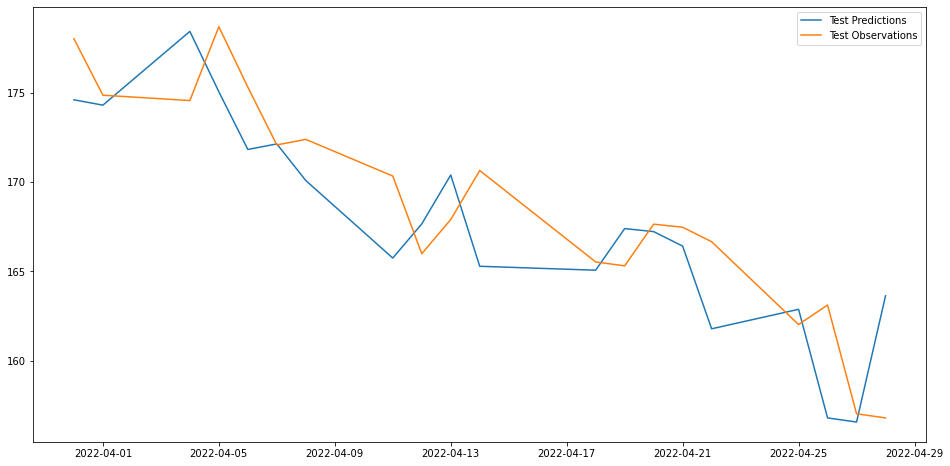

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df_compare3['Date'].tail(20), df_compare3['actual_close'].tail(20))
plt.plot(df_compare3['Date'].tail(20), df_compare3['pred_close'].tail(20))
plt.legend(['Test Predictions', 'Test Observations'])

### 4. To use model to predict stock price for other stocks

<BarContainer object of 4 artists>

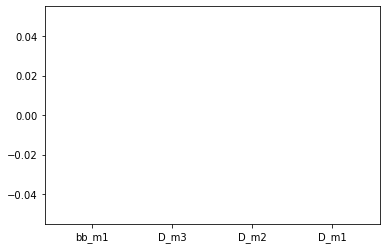

In [22]:
list(x_train.columns)
array = model.coef_[-1]
#check coefficient values to understand weight
df_weight = pd.DataFrame({0:list(x_train.columns),1:array})
plt.bar(x=df_weight[0], height=abs(df_weight[1]))